In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tools.plotting import table
plt.style.use('ggplot')
%matplotlib inline
from matplotlib.pyplot import suptitle
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

# Reading the data
ticket_data = pd.read_excel(r'D:\Asha\Imp\ML\Data\Tickets.xlsx')

In [2]:
#ticket_data[(ticket_data['TicketType'] == 'Issue') & (ticket_data['Priority'] == '3 - High')]
ticket_data.head(5)

,ticket,Requestor,RequestorSeniority,ITOwner,FiledAgainst,TicketType,Severity,Priority,daysOpen,Satisfaction
0,1,1929,1 - Junior,50,Systems,Issue,2 - Normal,0 - Unassigned,3,1 - Unsatisfied
1,2,1587,2 - Regular,15,Software,Request,1 - Minor,1 - Low,5,1 - Unsatisfied
2,3,925,2 - Regular,15,Access/Login,Request,2 - Normal,0 - Unassigned,0,0 - Unknown
3,4,413,4 - Management,22,Systems,Request,2 - Normal,0 - Unassigned,20,0 - Unknown
4,5,318,1 - Junior,22,Access/Login,Request,2 - Normal,1 - Low,1,1 - Unsatisfied


In [3]:
ticket_data[ticket_data.TicketType == 'Request']['daysOpen'].mean()

7.878599781548872

In [4]:
# Adding Ageing based on daysOpen
ticket_data['Age'] = ticket_data['daysOpen'].apply(lambda x: '0 days' if x==0 else('1 day' if x==1 
                                                                            else('2-5 days' if x>=2 and x<=5  else '>5 days')))

In [5]:
# Adding SLA column. 
# Please note SLA Met & Not Met is under the below assumed SLA levels.This is only fictional SLA level 
# for this dataset assuming 'daysOpen' implies overall Resolution time taken.
# Ticker Type: Issue
# Priority High -> Resolution SLA : 2 Days , Medium -> Resolution SLA : 4 Days, Low -> Resolution SLA : 6 Days
# Ticket Type: Request
# Priority High -> Resolution SLA : 3 Days , Medium -> Resolution SLA : 5 Days, Low -> Resolution SLA : 10 Days
def map_sla(df):
    if df.Priority=='0 - Unassigned':
        status = 'NA'
    elif df.TicketType=='Issue' and df.Priority=='3 - High' and df.daysOpen<=2:
        status = 'Met'
    elif df.TicketType=='Issue' and df.Priority=='2 - Medium' and df.daysOpen<=4:
        status = 'Met'
    elif df.TicketType=='Issue' and df.Priority=='1 - Low' and df.daysOpen<=6:
        status = 'Met'
    elif df.TicketType=='Request' and df.Priority=='3 - High' and df.daysOpen<=3:
        status = 'Met'
    elif df.TicketType=='Request' and df.Priority=='2 - Medium' and df.daysOpen<=5:
        status = 'Met'
    elif df.TicketType=='Request' and df.Priority=='1 - Low' and df.daysOpen<=10:
        status = 'Met'    
    else:
        status = 'Not Met'
    return status

ticket_data['SLA_Status'] = ticket_data.apply(map_sla,axis=1)

In [6]:
#ticket_data1 = ticket_data.loc[ticket_data.Satisfaction!='0 - Unknown']
#pd.pivot_table(ticket_data1,values='ticket',index=['RequestorSeniority','Age'],
     #          columns=['Satisfaction'],aggfunc='size')

In [7]:
# Function to create custom label for pie chart. 
#For each pie wedge, matplotlib supplies the percent value pct as the argument, though this time 
#it is sent as the argument to the function my_autopct. The wedge label is set to my_autopct(pct).
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%'.format(p=pct,v=val)
    return my_autopct


# Function to create label for bar chart 
def get_label_bar(ax):
    totals = []
    # find the values and append to list
    for i in ax.patches:
        totals.append(i.get_height())
    # set individual bar lables using above list
    total = sum(totals)
    # set individual bar lables using above list
    for i in ax.patches:
        # get_x pulls left or right; get_height pushes up or down
        ax.text(i.get_x(), i.get_height()+600, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=12,color='black')
    return


# Function to create label for horizontal bar chart 
def get_label_barh(ax):
    totals = []
    # find the values and append to list
    for i in ax.patches:
        totals.append(i.get_width())
    # set individual bar lables using above list
    total = sum(totals)
    # set individual bar lables using above list
    for i in ax.patches:
        # get_x pulls left or right; get_height pushes up or down
        ax.text(i.get_width()+600, i.get_y(), \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=12,color='black')
    return

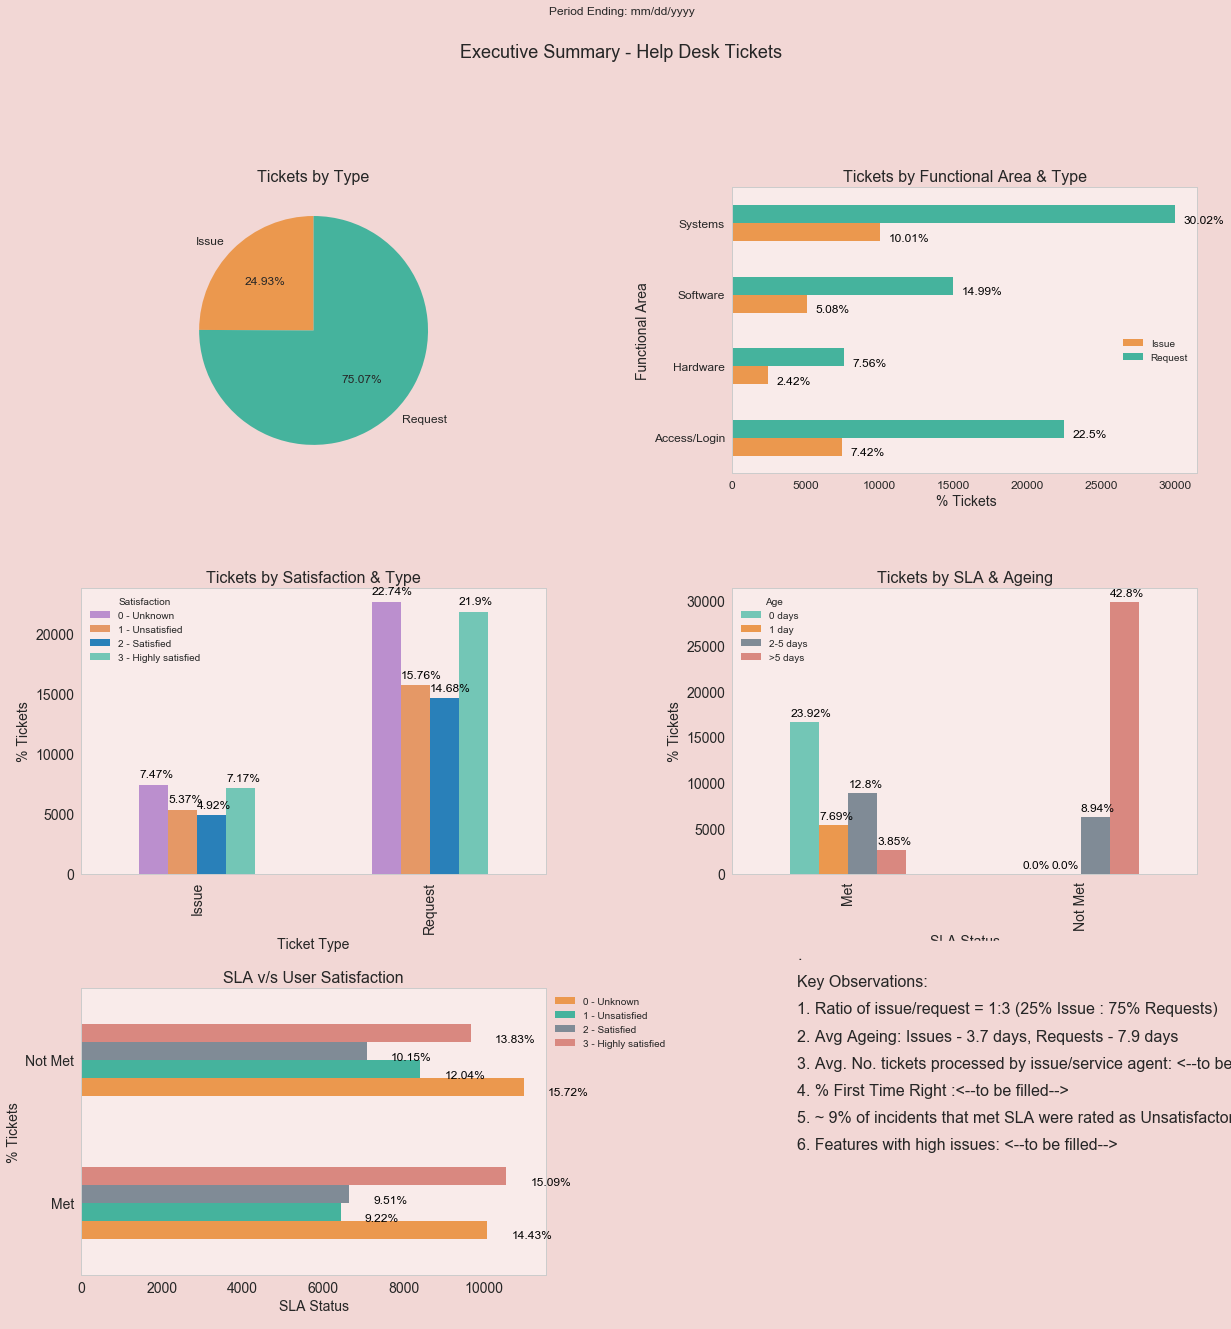

In [37]:
# Ticket Summary 

# Setting the Summary figure & subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,20))
fig.subplots_adjust(wspace=0.4)  # Adding horizontal space between charts
fig.subplots_adjust(hspace=0.4)  # Adding vertical space between charts
fig.set_facecolor('#F2D7D5')     # Setting the color of the figure
suptitle('Executive Summary - Help Desk Tickets',fontsize=18) # Adding title to the Dashboard
fig.text(0.45,1,'Period Ending: mm/dd/yyyy',fontsize=12)
#*************** Chart for Tickets by Ticket Type ***************
# create data
df = ticket_data.groupby('TicketType').size()
# Create a pieplot
df.plot(kind='pie',colors = ["#EB984E", "#45B39D"],autopct = make_autopct(df),fontsize=12,ax=axes[0,0],startangle=90)
axes[0,0].set_aspect("equal")
axes[0,0].set_title('Tickets by Type', fontsize=16)  # Title of the chart
axes[0,0].set_ylabel('')

#*************** Chart for Tickets by Functional Area & Ticket Type ***************
df = ticket_data.groupby(['FiledAgainst','TicketType']).size().unstack()
df.plot(kind='barh',colors = ["#EB984E", "#45B39D"],fontsize=12,ax=axes[0,1])
axes[0,1].grid(False)
axes[0,1].set_facecolor('#F9EBEA')  # Setting color of the chart
axes[0,1].set_title("Tickets by Functional Area & Type", fontsize=16) #Heading for the chart
axes[0,1].set_xlabel(" % Tickets", fontsize=14)  # X-axis label
axes[0,1].set_ylabel("Functional Area", fontsize=14) # Y-axis lable
axes[0,1].legend(bbox_to_anchor=(1, 0.5))
get_label_barh(axes[0,1])

#*************** Chart for Tickets by Customer Satisfaction & Type ***************
df = ticket_data.groupby(['TicketType','Satisfaction']).size().unstack()
df.plot(kind='bar',colors = ['#BB8FCE', '#E59866','#2980B9', '#73C6B6'],fontsize=14,ax=axes[1,0])
axes[1,0].grid(False)
axes[1,0].set_facecolor('#F9EBEA')
axes[1,0].set_title("Tickets by Satisfaction & Type", fontsize=16)
axes[1,0].set_xlabel("Ticket Type", fontsize=14)
axes[1,0].set_ylabel("% Tickets", fontsize=14)
get_label_bar(axes[1,0])

#*************** Chart for Tickets by Customer SLA & Ageing ***************
df = ticket_data[ticket_data['SLA_Status']!='NA']
df = df.groupby(['SLA_Status','Age']).size().unstack()
df.plot(kind='bar',colors = ['#73C6B6','#EB984E','#808B96','#D98880'],fontsize=14,ax=axes[1,1])
axes[1,1].grid(False)
axes[1,1].set_facecolor('#F9EBEA')
axes[1,1].set_title("Tickets by SLA & Ageing", fontsize=16)
axes[1,1].set_xlabel("SLA Status", fontsize=14)
axes[1,1].set_ylabel("% Tickets", fontsize=14)
get_label_bar(axes[1,1])

#*************** Chart for SLA v/s Satisfaction ***************
df = ticket_data[ticket_data['SLA_Status']!='NA']
df = df.groupby(['SLA_Status','Satisfaction']).size().unstack()
df.plot(kind='barh',colors = ["#EB984E", "#45B39D",'#808B96','#D98880'],fontsize=14,ax=axes[2,0])
axes[2,0].grid(False)
axes[2,0].set_facecolor('#F9EBEA')  # Setting color of the chart
axes[2,0].set_title("SLA v/s User Satisfaction", fontsize=16) #Heading for the chart
axes[2,0].set_xlabel("SLA Status", fontsize=14)  # X-axis label
axes[2,0].set_ylabel("% Tickets", fontsize=14) # Y-axis lable
axes[2,0].legend(bbox_to_anchor=(1, 1)) # Move legend out of plot area
get_label_barh(axes[2,0])

#*************** Table for Comments ***************
axes[2,1].axis('off')
axes[2,1].axis('tight')
df = pd.DataFrame(['Key Observations:',
                   '1. Ratio of issue/request = 1:3 (25% Issue : 75% Requests)',
                   '2. Avg Ageing: Issues - 3.7 days, Requests - 7.9 days',
                   '3. Avg. No. tickets processed by issue/service agent: <--to be filled--> ',
                   '4. % First Time Right :<--to be filled-->',
                   '5. ~ 9% of incidents that met SLA were rated as Unsatisfactory. RCA <--to be filled-->.',
                   '6. Features with high issues: <--to be filled-->','','','','','',''], 
                  columns=list('.'))
tab = axes[2,1].table(cellText=df.values, colLabels=df.columns, loc='center')
tab.auto_set_font_size(False)
## change cell properties
table_props=tab.properties()
table_cells=table_props['child_artists']
for cell in table_cells:
    cell.set_width(0.9)
    cell.set_height(0.095)
    cell.set_fontsize(16)
    cell.set_color('#F2D7D5')
    cell._loc='left'
    
plt.show()

# Save the Summary as PDF
fig.savefig(r'D:\Asha\Imp\ML\Exec_Summary_Tickets.pdf', bbox_inches='tight')

In [ ]:
# Above is an attempt to make an executive summary report for Help Desk tickets with the data available. 
# There is alot of information not available in the data set. E.g - Description, Notes, 
# Resolution Summary, # Resolution Category, Pending time,Date fields like Responded,Resolved,Closed, Reassigned etc
# I added couple of columns like Ageing, SLA with basic assumptions on existing data for little more detailed analysis.